<a href="https://colab.research.google.com/github/entangelk/study_data_analytics/blob/main/docs/quests/visualizations/multivariate_OrdersDeliveryList.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한글 폰트 설치 및 시각화

In [ ]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 런타임메뉴에서 리스타트 세션 해줘야함

- 한글 폰트 설치가 끝났으면 리스타트 잊지말라구!

In [1]:
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

In [4]:
# 유니코드 마이너스 사용 설정
plt.rcParams['axes.unicode_minus'] = False

## 시작

In [5]:
get_data = pd.read_csv('ShoppingMallDeliveryWithDate.csv')
get_data

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271.0,1,모바일웹,20181230
3,무통장입금,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600,1085.0,1,모바일웹,20181231
4,무통장입금,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710,1106.0,1,모바일웹,20181231
...,...,...,...,...,...,...,...,...,...
46744,카드,D-20171229-0000036-00,2017-12-29 오후 4:32,2018-01-02 오전 5:31,52800,445.0,1,모바일웹,20171229
46745,카드,D-20171229-0000043-00,2018-01-03 오전 9:45,2018-01-07 오전 5:38,112200,172.0,2,모바일웹,20171229
46746,카드,D-20171230-0000022-01,2018-01-02 오후 7:06,2018-01-11 오전 2:46,36000,140.0,1,네이버 페이,20171230
46747,카드,D-20171231-0000017-01,2018-01-03 오후 2:00,2018-01-06 오후 6:06,73460,184.0,1,네이버 페이,20171231


In [6]:
def convert_time(x):
    date, ampm, time = x.split()
    if ampm == "오후" and time != "12:00":
        hour, minute = map(int, time.split(":"))
        time = f"{hour+12 if hour != 12 else hour}:{minute}"
    return pd.to_datetime(f"{date} {time}", format="%Y-%m-%d %H:%M")

In [7]:
get_data['배송시작일'] = get_data['배송시작일'].apply(convert_time)
get_data['배송완료일'] = get_data['배송완료일'].apply(convert_time)

In [8]:
struct_data = get_data[['결제수단','상품구매금액','수량','주문경로','상품번호','배송시작일','배송완료일','주문일']]
struct_data

,결제수단,상품구매금액,수량,주문경로,상품번호,배송시작일,배송완료일,주문일
0,무통장입금,71450,1,PC쇼핑몰,1077.0,2019-01-07 08:56:00,2019-01-11 05:32:00,20181227
1,무통장입금,141240,2,모바일웹,42.0,2019-01-03 09:30:00,2019-01-07 05:32:00,20181229
2,무통장입금,13910,1,모바일웹,1271.0,2019-01-03 09:30:00,2019-01-07 05:32:00,20181230
3,무통장입금,81600,1,모바일웹,1085.0,2019-01-03 09:30:00,2019-01-07 05:32:00,20181231
4,무통장입금,94710,1,모바일웹,1106.0,2019-01-07 08:56:00,2019-01-11 05:32:00,20181231
...,...,...,...,...,...,...,...,...
46744,카드,52800,1,모바일웹,445.0,2017-12-29 16:32:00,2018-01-02 05:31:00,20171229
46745,카드,112200,2,모바일웹,172.0,2018-01-03 09:45:00,2018-01-07 05:38:00,20171229
46746,카드,36000,1,네이버 페이,140.0,2018-01-02 19:06:00,2018-01-11 02:46:00,20171230
46747,카드,73460,1,네이버 페이,184.0,2018-01-03 14:00:00,2018-01-06 18:06:00,20171231


In [9]:
struct_data['주문일'] = pd.to_datetime(struct_data['주문일'],format="%Y%m%d")
struct_data['주문일']

<ipython-input-9-9bb60e2cf1cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  struct_data['주문일'] = pd.to_datetime(struct_data['주문일'],format="%Y%m%d")


0       2018-12-27
1       2018-12-29
2       2018-12-30
3       2018-12-31
4       2018-12-31
           ...    
46744   2017-12-29
46745   2017-12-29
46746   2017-12-30
46747   2017-12-31
46748   2017-12-31
Name: 주문일, Length: 46749, dtype: datetime64[ns]

In [10]:
pivot_how_many = pd.pivot_table(data=struct_data[['결제수단','수량']], index=['결제수단'], values=['수량'], aggfunc='count').sort_values('수량', ascending=False)
pivot_how_many # 바플롯

,수량
결제수단,
무통장입금,24171
카드,13703
"적립금,무통장입금",3374
"쿠폰,카드",1306
"적립금,카드",1276
"쿠폰,무통장입금",1204
휴대폰,430
실시간계좌이체,322
"예치금,무통장입금",175


In [11]:
pivot_how_much = pd.pivot_table(data=struct_data[['결제수단','상품구매금액']], index=['결제수단'], values=['상품구매금액'], aggfunc='sum').sort_values('상품구매금액', ascending=False)
pivot_how_much  #바플롯

,상품구매금액
결제수단,
무통장입금,1648386554
카드,964388905
"적립금,무통장입금",253978716
"적립금,카드",96588600
"쿠폰,무통장입금",83835150
"쿠폰,카드",79419780
실시간계좌이체,26855650
휴대폰,22707770
"예치금,무통장입금",12396800


In [12]:
pivot_how_when = pd.pivot_table(data=struct_data[['결제수단','주문일']], index=['주문일'], values=['결제수단'], aggfunc='count')
pivot_how_when # 주문일 별 결제수단을 세분화하여 표현하는 방법을 모르겠으므로 패스

,결제수단
주문일,
2017-01-01,1
2017-01-15,1
2017-01-18,1
2017-01-23,1
2017-02-02,1
...,...
2019-05-31,74
2019-06-01,1
2019-06-02,4


In [13]:
pivot_path_many = pd.pivot_table(data=struct_data[['주문경로','수량']], index=['주문경로'], values=['수량'], aggfunc='count').sort_values('수량', ascending=False)
pivot_path_many

,수량
주문경로,
PC쇼핑몰,25695
모바일웹,18531
네이버 페이,2523


In [14]:
pivot_path_much = pd.pivot_table(data=struct_data[['주문경로','상품구매금액']], index=['주문경로'], values=['상품구매금액'], aggfunc='sum').sort_values('상품구매금액', ascending=False)
pivot_path_much

,상품구매금액
주문경로,
PC쇼핑몰,1756650465
모바일웹,1278260260
네이버 페이,207980660


In [15]:
struct_data

,결제수단,상품구매금액,수량,주문경로,상품번호,배송시작일,배송완료일,주문일
0,무통장입금,71450,1,PC쇼핑몰,1077.0,2019-01-07 08:56:00,2019-01-11 05:32:00,2018-12-27
1,무통장입금,141240,2,모바일웹,42.0,2019-01-03 09:30:00,2019-01-07 05:32:00,2018-12-29
2,무통장입금,13910,1,모바일웹,1271.0,2019-01-03 09:30:00,2019-01-07 05:32:00,2018-12-30
3,무통장입금,81600,1,모바일웹,1085.0,2019-01-03 09:30:00,2019-01-07 05:32:00,2018-12-31
4,무통장입금,94710,1,모바일웹,1106.0,2019-01-07 08:56:00,2019-01-11 05:32:00,2018-12-31
...,...,...,...,...,...,...,...,...
46744,카드,52800,1,모바일웹,445.0,2017-12-29 16:32:00,2018-01-02 05:31:00,2017-12-29
46745,카드,112200,2,모바일웹,172.0,2018-01-03 09:45:00,2018-01-07 05:38:00,2017-12-29
46746,카드,36000,1,네이버 페이,140.0,2018-01-02 19:06:00,2018-01-11 02:46:00,2017-12-30
46747,카드,73460,1,네이버 페이,184.0,2018-01-03 14:00:00,2018-01-06 18:06:00,2017-12-31


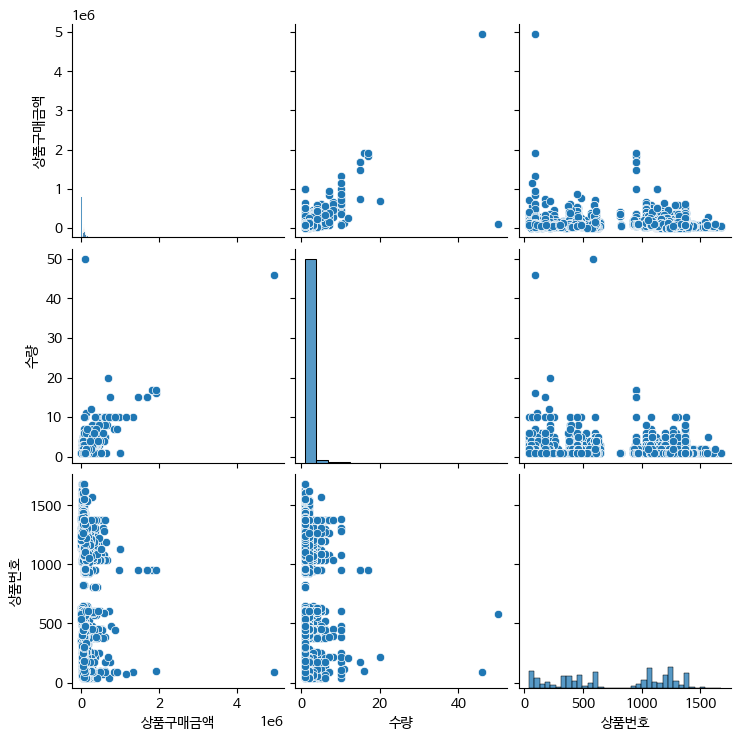

In [16]:
sns.pairplot(data=struct_data)

In [17]:
struct_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   결제수단    46749 non-null  object        
 1   상품구매금액  46749 non-null  int64         
 2   수량      46749 non-null  int64         
 3   주문경로    46749 non-null  object        
 4   상품번호    46661 non-null  float64       
 5   배송시작일   46749 non-null  datetime64[ns]
 6   배송완료일   46749 non-null  datetime64[ns]
 7   주문일     46749 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(2), object(2)
memory usage: 2.9+ MB


### 산점도 = 연속형 / 연속형

<Axes: xlabel='상품구매금액', ylabel='수량'>

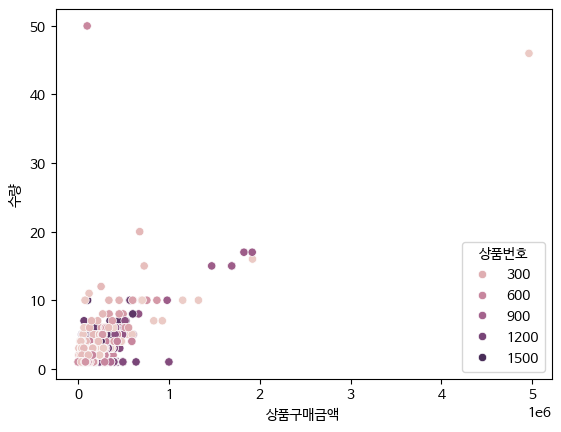

In [18]:
sns.scatterplot(data=struct_data, x='상품구매금액', y='수량', hue='상품번호')

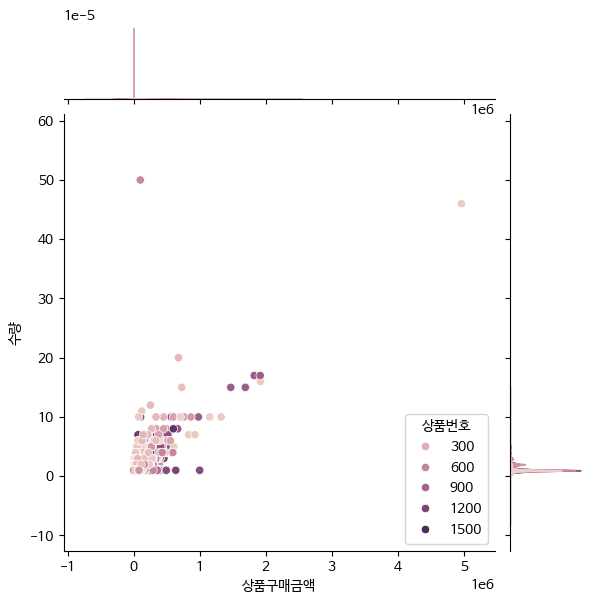

In [19]:
sns.jointplot(data=struct_data, x='상품구매금액', y='수량', hue='상품번호')

### 막대그래프 = 범주 / 연속

<Axes: xlabel='주문일', ylabel='상품구매금액'>

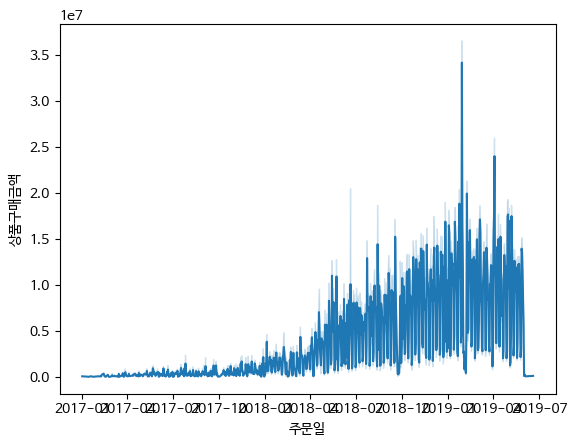

In [20]:
sns.lineplot(data=struct_data, x='주문일', y='상품구매금액', estimator=sum)

<Axes: xlabel='주문일', ylabel='수량'>

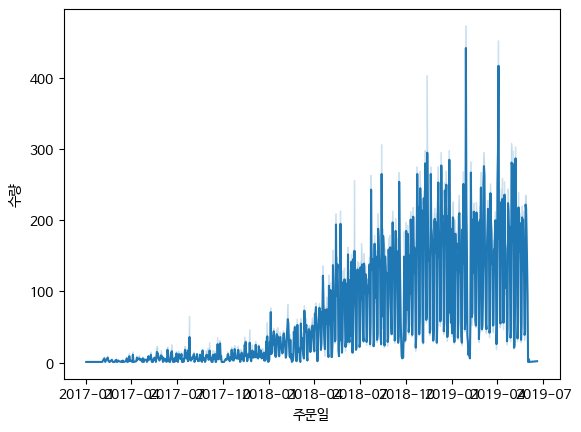

In [21]:
sns.lineplot(data=struct_data, x='주문일', y='수량', estimator=sum)

<Axes: xlabel='상품번호', ylabel='상품구매금액'>

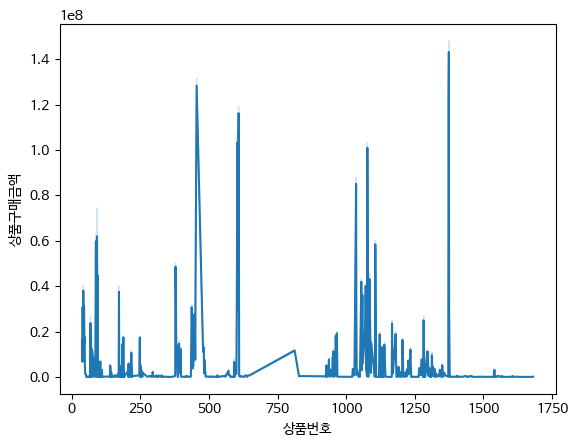

In [22]:
sns.lineplot(data=struct_data, x='상품번호', y='상품구매금액', estimator=sum)

<Axes: xlabel='상품번호', ylabel='수량'>

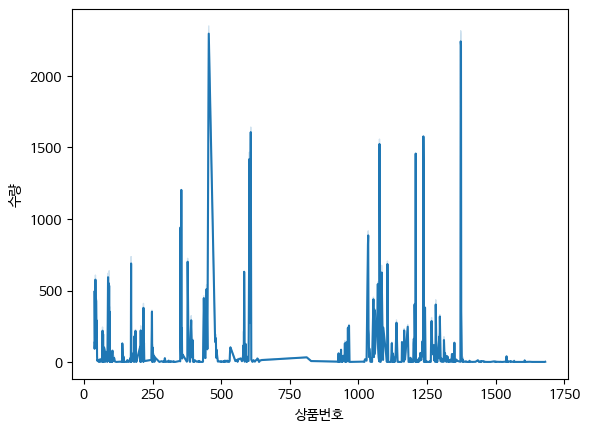

In [23]:
sns.lineplot(data=struct_data, x='상품번호', y='수량', estimator=sum)

### 범주 범주 바플롯

<Axes: xlabel='결제수단', ylabel='수량'>

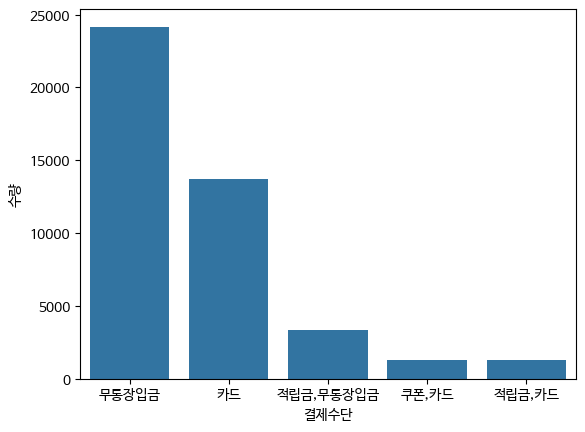

In [24]:
sns.barplot(data=pivot_how_many[:5], x='결제수단', y='수량')

<Axes: xlabel='결제수단', ylabel='상품구매금액'>

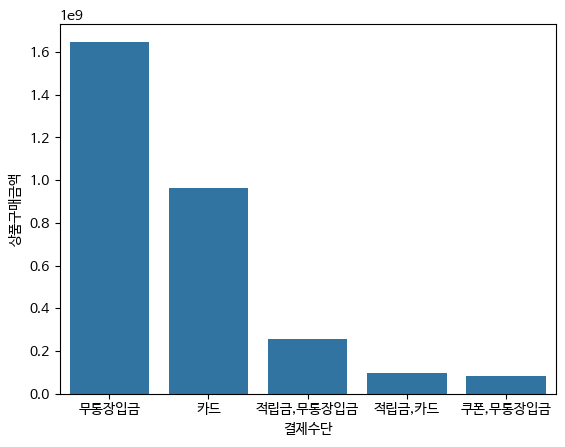

In [25]:
sns.barplot(data=pivot_how_much[:5], x='결제수단', y='상품구매금액')

<Axes: xlabel='주문경로', ylabel='수량'>

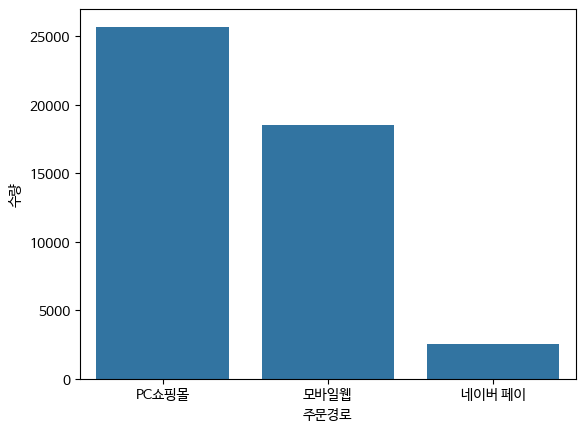

In [26]:
sns.barplot(data=pivot_path_many, x='주문경로', y='수량')

<Axes: xlabel='주문경로', ylabel='상품구매금액'>

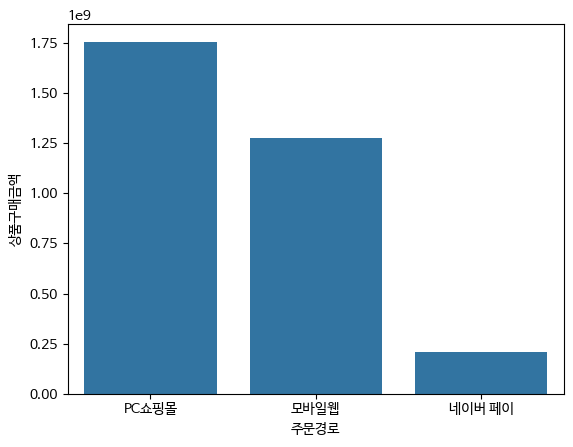

In [27]:
sns.barplot(data=pivot_path_much, x='주문경로', y='상품구매금액')